In [117]:
import torch 
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [118]:
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype = np.float32)
x_train.shape


(11,)

In [119]:
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [120]:
y_values = [i**2+ 2*i+1 for i in x_values]
y_values

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

In [121]:
y_train = np.array(y_values, dtype = np.float32)
y_train.shape

(11,)

In [122]:
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

In [123]:
class LinearRegressionModel(nn.Module):
    def __init__ (self,input_size,output_size):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    

In [124]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [125]:
criterion = nn.MSELoss()

In [126]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [127]:
epochs = 100

In [128]:
for epoch in range(epochs):
    epoch +=1
    
    inputs = Variable(torch.from_numpy(x_train), requires_grad= True)
    labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    
    print("epoch {}, loss {}".format(epoch,loss.data[0]))

epoch 1, loss 3218.6904296875
epoch 2, loss 401.1357421875
epoch 3, loss 170.56895446777344
epoch 4, loss 151.02296447753906
epoch 5, loss 148.69757080078125
epoch 6, loss 147.78489685058594
epoch 7, loss 146.99560546875
epoch 8, loss 146.22430419921875
epoch 9, loss 145.46238708496094
epoch 10, loss 144.7090301513672
epoch 11, loss 143.964111328125
epoch 12, loss 143.22752380371094
epoch 13, loss 142.4990692138672
epoch 14, loss 141.77886962890625
epoch 15, loss 141.06663513183594
epoch 16, loss 140.36236572265625
epoch 17, loss 139.666015625
epoch 18, loss 138.97740173339844
epoch 19, loss 138.29647827148438
epoch 20, loss 137.62315368652344
epoch 21, loss 136.95733642578125
epoch 22, loss 136.29898071289062
epoch 23, loss 135.64796447753906
epoch 24, loss 135.00421142578125
epoch 25, loss 134.36766052246094
epoch 26, loss 133.73822021484375
epoch 27, loss 133.11578369140625
epoch 28, loss 132.50033569335938
epoch 29, loss 131.89173889160156
epoch 30, loss 131.28990173339844
epoch 31

In [129]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted
y_train

array([[  1.],
       [  4.],
       [  9.],
       [ 16.],
       [ 25.],
       [ 36.],
       [ 49.],
       [ 64.],
       [ 81.],
       [100.],
       [121.]], dtype=float32)

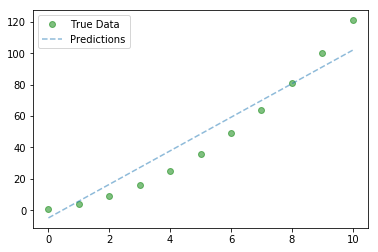

In [130]:
plt.clf()
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'go', label='True Data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()